In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import matplotlib.pyplot as plt

In [2]:
# Load in the pre-scraped (but mnot QCed) demand datasets

peak_met = pd.read_csv("outputs/peak_met_MW.csv")
daily_energy_met = pd.read_csv("outputs/daily_energy_met_MU.csv")

print(daily_energy_met)

            Date  Andaman and Nicobar Islands  Andhra Pradesh  \
0     2013-01-01                          NaN           247.4   
1     2013-01-02                          NaN           253.0   
2     2013-01-03                          NaN           256.1   
3     2013-01-04                          NaN           252.6   
4     2013-01-05                          NaN           248.6   
...          ...                          ...             ...   
4269  2025-03-27                          NaN           255.0   
4270  2025-03-28                          NaN           257.2   
4271  2025-03-29                          NaN           256.6   
4272  2025-03-30                          NaN           248.8   
4273  2025-03-31                          NaN           244.8   

      Arunachal Pradesh  Assam  Bihar  Chandigarh  Chhattisgarh  \
0                   1.5   18.6   36.6         3.8          64.4   
1                   1.7   17.5   40.5         3.8          64.2   
2                 

In [3]:
def replace_outliers_with_neighbour_mean(df):
    substitutions_made = []

    for column in df.columns:
        # Skip the Date and Total columns
        if column not in ['Date']:
            # Compute the differences between consecutive days
            differences = df[column].diff().abs()

            # Compute the average difference
            avg_diff = differences.mean()

            # Find unusually large differences
            outliers = differences > 10 * avg_diff

            # Iterate through the outliers
            for idx in df[outliers].index:
                # If it's the first or last element, don't do anything
                if idx == 0 or idx == len(df) - 1:
                    continue

                # Record the column and date of substitution
                substitutions_made.append((column, df.at[idx, 'Date']))

                # Find non-outlier neighbors
                left_idx = idx - 1
                while left_idx in df[outliers].index and left_idx > 0:
                    left_idx -= 1

                right_idx = idx + 1
                while right_idx in df[outliers].index and right_idx < len(df) - 1:
                    right_idx += 1

                # Use weighted mean of neighbors to substitute outlier
                left_distance = abs(left_idx - idx)
                right_distance = abs(right_idx - idx)

                weighted_mean = (df.at[left_idx, column] * right_distance + df.at[right_idx, column] * left_distance) / (left_distance + right_distance)
                df.at[idx, column] = weighted_mean


    # Print the substitutions made
    for column, date in substitutions_made:
        print(f"Substitution made in column '{column}' for date '{date}'")

    return df

In [4]:
%matplotlib inline
plt.ioff()

daily_energy_met['Date'] = pd.to_datetime(daily_energy_met['Date'])
plt.plot(daily_energy_met['Date'], peak_met['Himachal Pradesh'], label="Original", color='blue')


In [5]:
# Replace outliers in both dataframes
peak_met = replace_outliers_with_neighbour_mean(peak_met)
print("")
daily_energy_met = replace_outliers_with_neighbour_mean(daily_energy_met)

peak_met.to_csv("outputs/corrected_peak_met_MW.csv", index=False)
daily_energy_met.to_csv("outputs/corrected_daily_energy_met_MU.csv", index=False)


Substitution made in column 'Andhra Pradesh' for date '2014-06-02'
Substitution made in column 'Andhra Pradesh' for date '2014-09-29'
Substitution made in column 'Andhra Pradesh' for date '2014-09-30'
Substitution made in column 'Andhra Pradesh' for date '2016-06-29'
Substitution made in column 'Andhra Pradesh' for date '2016-06-30'
Substitution made in column 'Andhra Pradesh' for date '2016-07-22'
Substitution made in column 'Andhra Pradesh' for date '2016-07-23'
Substitution made in column 'Andhra Pradesh' for date '2022-06-06'
Substitution made in column 'Arunachal Pradesh' for date '2021-03-22'
Substitution made in column 'Arunachal Pradesh' for date '2021-03-23'
Substitution made in column 'Arunachal Pradesh' for date '2022-01-19'
Substitution made in column 'Assam' for date '2024-05-28'
Substitution made in column 'Bihar' for date '2020-09-24'
Substitution made in column 'Bihar' for date '2021-05-29'
Substitution made in column 'Bihar' for date '2022-02-03'
Substitution made in c

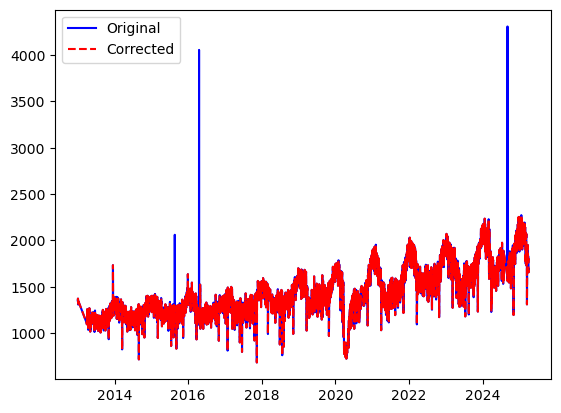

In [6]:
plt.plot(daily_energy_met['Date'], peak_met['Himachal Pradesh'], label="Corrected", color='red', linestyle='--')
plt.legend()
plt.show()